# Metro Interstate Traffic Volume

The Metro Interstate Traffic Volume dataset provides hourly records of traffic volume for the westbound I-94 Interstate highway in Minneapolis-St Paul, MN, spanning from 2012 to 2018. The dataset includes various features such as weather conditions, holidays, and temporal information that can be utilized for traffic analysis and forecasting.

Features:

* holiday: Categorical variable indicating US National holidays and regional holidays like the Minnesota State Fair.
* temp: Numeric variable representing the average temperature in Kelvin.
* rain_1h: Numeric variable indicating the amount of rain in millimeters that occurred in the hour.
* snow_1h: Numeric variable indicating the amount of snow in millimeters that occurred in the hour.
* clouds_all: Numeric variable representing the percentage of cloud cover.
* weather_main: Categorical short description of the current weather conditions.
* weather_description: Categorical detailed description of the current weather conditions.
* date_time: DateTime variable indicating the hour when data was collected in local CST time.
* traffic_volume: Numeric variable representing the hourly reported westbound traffic volume on I-94 ATR 301.

# Importing necessarily library 
This cell imports all the necessary libraries for handling data, preprocessing, model creation, and visualization.

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error

In [11]:
df=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [12]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


# Dataset Summary and Exploration
Inspecting the DataFrame Structure and Basic Statistics

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [15]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [16]:
df.describe(include='object')

,holiday,weather_main,weather_description,date_time
count,61,48204,48204,48204
unique,11,11,38,40575
top,Labor Day,Clouds,sky is clear,2013-05-19 10:00:00
freq,7,15164,11665,6


In [17]:
df.isnull().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

In [18]:
df.duplicated().sum()

17

* Date Range Analysis
  
Finding the Maximum and Minimum Dates in the Dataset

In [20]:
print("max date :" +df['date_time'].max())
print("min date :" +df['date_time'].min())

max date :2018-09-30 23:00:00
min date :2012-10-02 09:00:00


# Exploratory Data Analysis (EDA)
Understanding Data Distributions and Preparing for Modeling

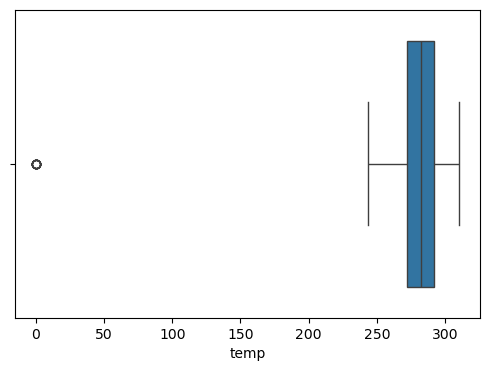

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(df['temp'], orient='h')
plt.show()

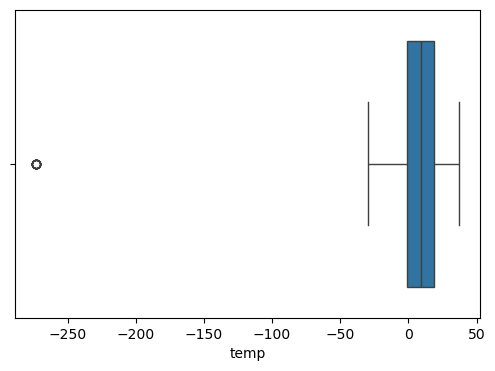

In [23]:
# Convert temperature data from Kelvin to Celsius
df['temp'] = (df['temp']  - 273.15)
plt.figure(figsize=(6,4))
sns.boxplot(df['temp'], orient='h')
plt.show()

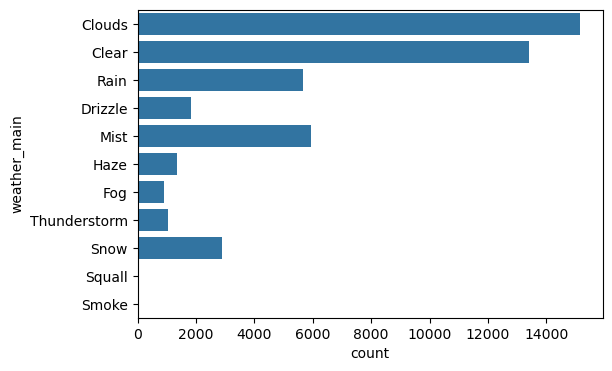

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(df['weather_main'])
plt.show()

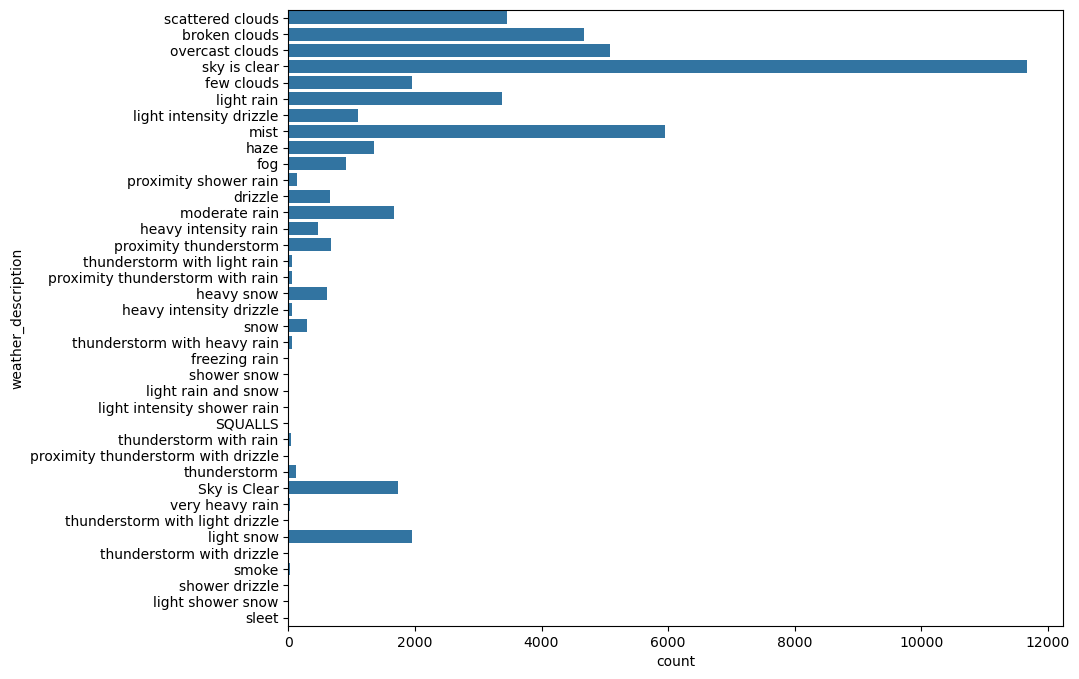

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(df['weather_description'])
plt.show()

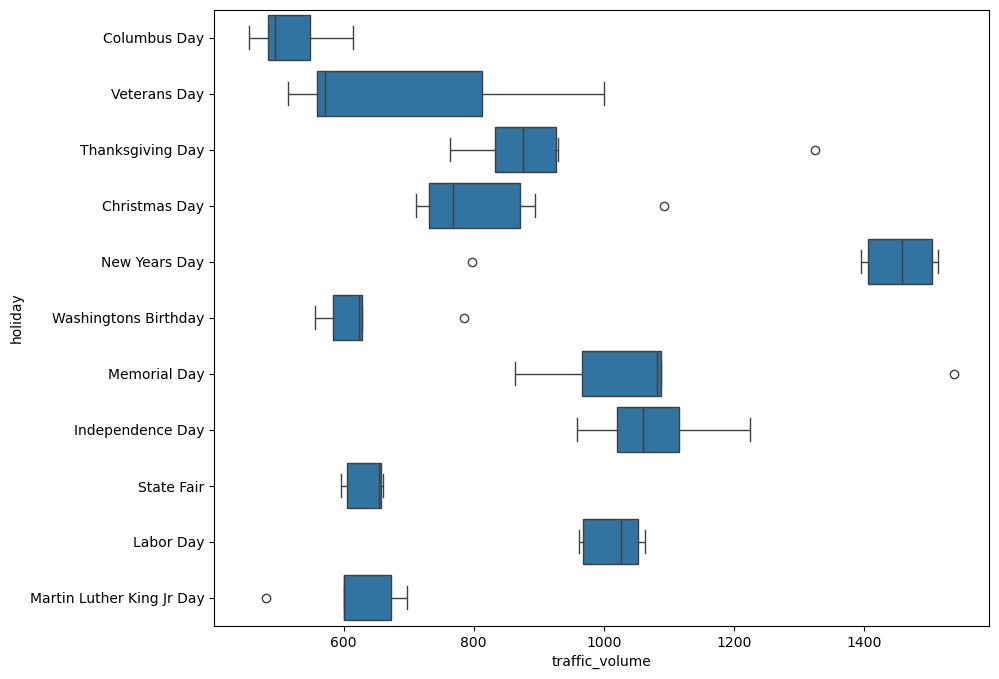

In [26]:
#Exploring traffic volume on holidays
plt.figure(figsize=(10,8))
sns.boxplot(y='holiday',x='traffic_volume', data = df)
plt.show()

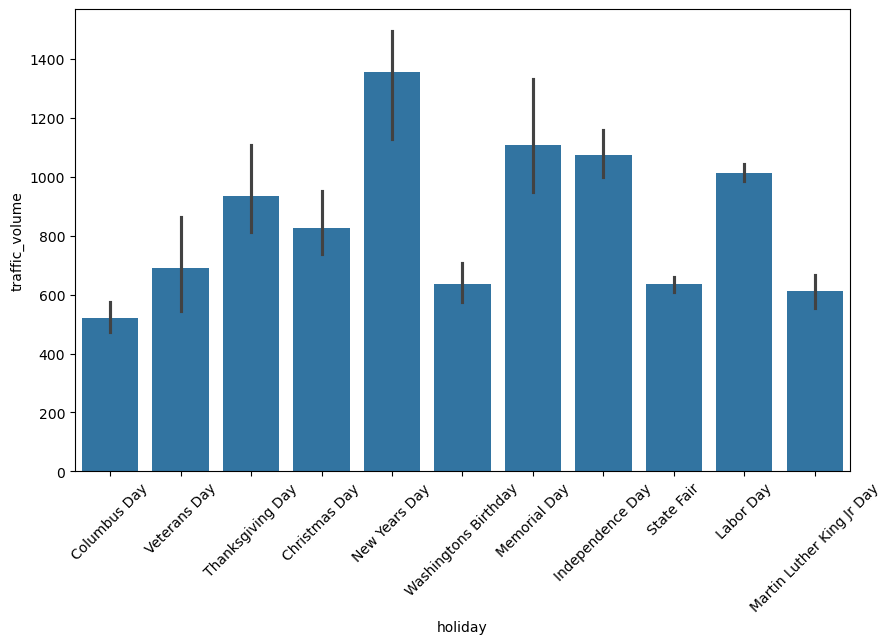

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(df, x='holiday', y='traffic_volume')
plt.xticks(rotation=45)
plt.show()

# Data pre-processing
Preparing Data for Analysis and Modeling

In [29]:
#copying data to new data frame
df_cleaned = df.copy()

*  extracting useful features

In [31]:
#Extracting features from date_time variable
df_cleaned['date_time'] = pd.to_datetime(df_cleaned['date_time'])
df_cleaned['weekday'] = df_cleaned['date_time'].dt.weekday
df_cleaned['date'] = df_cleaned['date_time'].dt.date
df_cleaned['hour'] = df_cleaned['date_time'].dt.hour
df_cleaned['year'] = df_cleaned['date_time'].dt.year

In [32]:
df_cleaned.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,year
0,NaN,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,9,2012
1,NaN,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,10,2012
2,NaN,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,11,2012
3,NaN,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,12,2012
4,NaN,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,13,2012


* handle missing  value

In [34]:
df_cleaned['holiday'].fillna('Unknown', inplace=True)

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_1083/2838995405.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['holiday'].fillna('Unknown', inplace=True)


In [35]:
df_cleaned.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,year
0,Unknown,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,9,2012
1,Unknown,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,10,2012
2,Unknown,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,11,2012
3,Unknown,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,12,2012
4,Unknown,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,13,2012


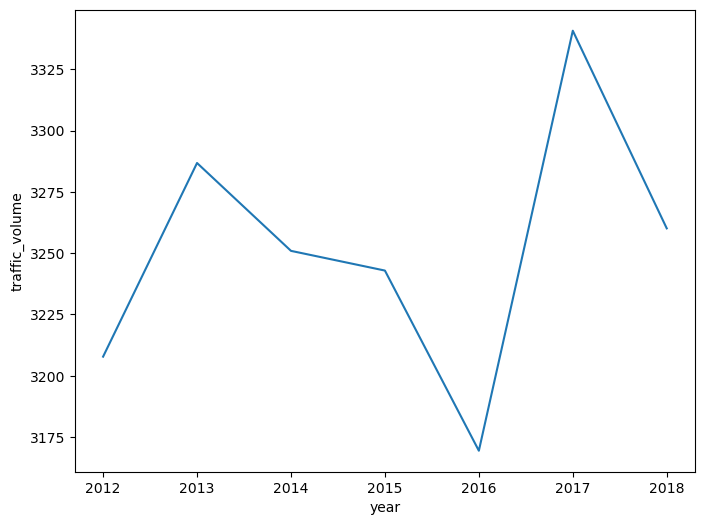

In [36]:
#aggreagating traffic volume over year and plotting 

df_date_traffic = df_cleaned.groupby('year').aggregate({'traffic_volume':'mean'})
plt.figure(figsize=(8,6))
sns.lineplot(x = df_date_traffic.index, y = df_date_traffic.traffic_volume, data = df_date_traffic)
plt.show()

In [37]:
df_cleaned.drop_duplicates()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,year
0,Unknown,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,9,2012
1,Unknown,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,10,2012
2,Unknown,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,11,2012
3,Unknown,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,12,2012
4,Unknown,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,13,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,Unknown,10.30,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,6,2018-09-30,19,2018
48200,Unknown,9.61,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,6,2018-09-30,20,2018
48201,Unknown,9.58,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,6,2018-09-30,21,2018
48202,Unknown,8.94,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,6,2018-09-30,22,2018


In [38]:
df_cleaned=df_cleaned.set_index('date')

In [39]:
df_cleaned

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,hour,year
date,,,,,,,,,,,,
2012-10-02,Unknown,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,9,2012
2012-10-02,Unknown,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,10,2012
2012-10-02,Unknown,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,11,2012
2012-10-02,Unknown,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,12,2012
2012-10-02,Unknown,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,13,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30,Unknown,10.30,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,6,19,2018
2018-09-30,Unknown,9.61,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,6,20,2018
2018-09-30,Unknown,9.58,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,6,21,2018


In [40]:
#categorizing hours to different time periods like morning, afternoon etc
def hour_modify(x):
    Early_Morning = [4,5,6,7]
    Morning = [8,9,10,11]
    Afternoon = [12,13,14,15]
    Evening = [16,17,18,19]
    Night = [20,21,22,23]
    Late_Night = [24,1,2,3]
    if x in Early_Morning:
        return 'Early_Morning'
    elif x in Morning:
        return 'Morning'
    elif x in Afternoon:
        return 'Afternoon'
    elif x in Evening:
        return 'Evening'
    elif x in Night:
        return 'Night'
    else:
        return 'Late_Night'
    
df_cleaned['hour'] = df_cleaned.hour.map(hour_modify)

In [41]:
df_cleaned

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,hour,year
date,,,,,,,,,,,,
2012-10-02,Unknown,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,Morning,2012
2012-10-02,Unknown,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,Morning,2012
2012-10-02,Unknown,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,Morning,2012
2012-10-02,Unknown,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,Afternoon,2012
2012-10-02,Unknown,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,Afternoon,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30,Unknown,10.30,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,6,Evening,2018
2018-09-30,Unknown,9.61,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,6,Night,2018
2018-09-30,Unknown,9.58,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,6,Night,2018


In [42]:
df_cleaned.dtypes

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
weekday                         int32
hour                           object
year                            int32
dtype: object

In [43]:
df_cleaned.describe()

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume,weekday,year
count,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204.000000,48204.000000,48204.000000
mean,8.055870,0.334264,0.000222,49.362231,2016-01-05 10:46:16.773711616,3259.818355,2.984980,2015.512426
min,-273.150000,0.000000,0.000000,0.000000,2012-10-02 09:00:00,0.000000,0.000000,2012.000000
25%,-0.990000,0.000000,0.000000,1.000000,2014-02-06 11:45:00,1193.000000,1.000000,2014.000000
50%,9.300000,0.000000,0.000000,64.000000,2016-06-11 03:30:00,3380.000000,3.000000,2016.000000
75%,18.656000,0.000000,0.000000,90.000000,2017-08-11 06:00:00,4933.000000,5.000000,2017.000000
max,36.920000,9831.300000,0.510000,100.000000,2018-09-30 23:00:00,7280.000000,6.000000,2018.000000
std,13.338232,44.789133,0.008168,39.015750,NaN,1986.860670,2.005941,1.893211


In [44]:
encoder=LabelEncoder()

# Apply LabelEncoder to each categorical column
df_cleaned['holiday'] = encoder.fit_transform(df_cleaned['holiday'])
df_cleaned['weather_main'] = encoder.fit_transform(df_cleaned['weather_main'])
df_cleaned['weather_description'] = encoder.fit_transform(df_cleaned['weather_description'])
df_cleaned['hour'] = encoder.fit_transform(df_cleaned['hour'])

In [45]:
df_cleaned

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,hour,year
date,,,,,,,,,,,,
2012-10-02,9,15.13,0.0,0.0,40,1,24,2012-10-02 09:00:00,5545,1,4,2012
2012-10-02,9,16.21,0.0,0.0,75,1,2,2012-10-02 10:00:00,4516,1,4,2012
2012-10-02,9,16.43,0.0,0.0,90,1,19,2012-10-02 11:00:00,4767,1,4,2012
2012-10-02,9,16.98,0.0,0.0,90,1,19,2012-10-02 12:00:00,5026,1,0,2012
2012-10-02,9,17.99,0.0,0.0,75,1,2,2012-10-02 13:00:00,4918,1,0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30,9,10.30,0.0,0.0,75,1,2,2018-09-30 19:00:00,3543,6,2,2018
2018-09-30,9,9.61,0.0,0.0,90,1,19,2018-09-30 20:00:00,2781,6,5,2018
2018-09-30,9,9.58,0.0,0.0,90,10,21,2018-09-30 21:00:00,2159,6,5,2018


# Data Preparation and Feature Scaling
Using a scaling method MinMaxScaler.

In [47]:
# Select features and target
features = ['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description', 'weekday', 'hour', 'year']
target = 'traffic_volume'

In [48]:
# Feature scaling for features
scaler_features = MinMaxScaler()
df_scaled_features = scaler_features.fit_transform(df_cleaned[features])

# Scaling the target (traffic_volume) separately
scaler_target = MinMaxScaler()
df_scaled_target = scaler_target.fit_transform(df_cleaned[[target]])

# Combine the scaled features and target into one array
df_scaled = np.hstack((df_scaled_features, df_scaled_target))

In [49]:
# Creating sequences with multiple features
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # All features except the target
        y.append(data[i+seq_length, -1])  # Only the target (traffic_volume)
    return np.array(X), np.array(y)

In [50]:
seq_length = 10  # Example sequence length (10 day's)
X, y = create_sequences(df_scaled, seq_length)

# Train-Test Split

Split the dataset into training and testing sets.

In [52]:
# Splitting data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [53]:
X_train.shape, y_train.shape, y_test.shape, X_test.shape

((38555, 10, 10), (38555,), (9639,), (9639, 10, 10))

In [54]:
# Reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Model Selection and Training

We choose three models for time series forecasting.

**1- RNN Model Training**

In [56]:
model_1 = Sequential()

model_1.add(SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_1.add(SimpleRNN(32))
model_1.add(Dense(1))

model_1.compile(optimizer='adam', loss='mean_squared_error')

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 10, 64)         │         4,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,937 (31.00 KB)

 Trainable params: 7,937 (31.00 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_1 = model_1.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0779 - val_loss: 0.0259
Epoch 2/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0281 - val_loss: 0.0195
Epoch 3/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0211 - val_loss: 0.0137
Epoch 4/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0167 - val_loss: 0.0110
Epoch 5/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0149 - val_loss: 0.0119
Epoch 6/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0135 - val_loss: 0.0121
Epoch 7/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0129 - val_loss: 0.0095
Epoch 8/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0120 - val_loss: 0.0093
Epoch 9/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0122 - val_loss: 0.0105
Epoch 10/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0115 - val_loss: 0.0094


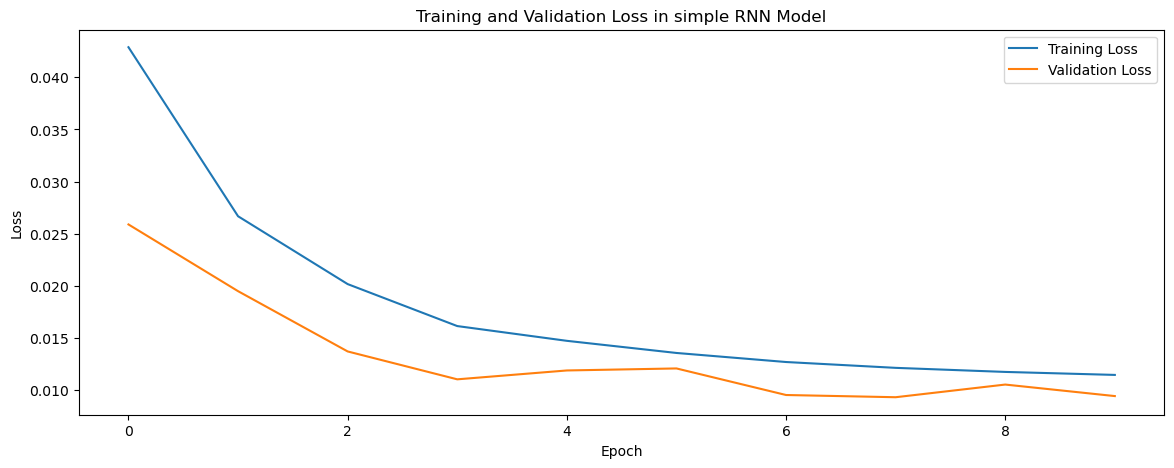

In [59]:
#plot the training and validation loss
plt.figure(figsize=(14, 5))
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss in simple RNN Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Make Model 1 Predictions

Generate predictions on the test dataset.

In [61]:
# Making predictions
predictions_1 = model_1.predict(X_test)

302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step


In [62]:
predictions_1.shape

(9639, 1)

## Model Model 1 Evaluation

Evaluate the performance of our first model on the test dataset.

Calculate evaluation metrics using MAE, MSE.

In [173]:
# Assuming you have the true values (y_true) and the predicted values (y_pred)
mae = mean_absolute_error(y_test, predictions_1)
mse = mean_squared_error(y_test, predictions_1)
r = root_mean_squared_error(y_test, predictions_1)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {r:.2f}")

MAE: 0.07
RMSE: 0.10


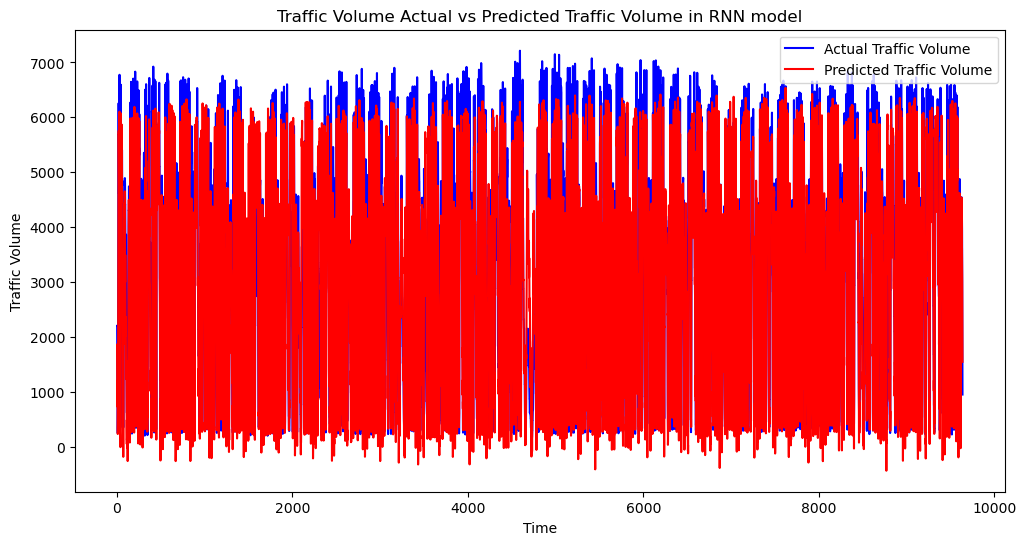

In [65]:
predictions_rescaled_1 = scaler_target.inverse_transform(np.concatenate((predictions_1, np.zeros((predictions_1.shape[0], 10))), axis=1))[:, 0]
Y_test_rescaled_1 = scaler_target.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 10))), axis=1))[:, 0]

plt.figure(figsize=(12,6))
plt.plot(Y_test_rescaled_1, label='Actual Traffic Volume', color='blue')
plt.plot(predictions_rescaled_1, label='Predicted Traffic Volume', color='red')
plt.title('Traffic Volume Actual vs Predicted Traffic Volume in RNN model')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

**LSTM Model Training**

In [67]:
# Build and compile the LSTM model
model_2 = Sequential()

model_2.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_2.add(LSTM(32))
model_2.add(Dense(1))

model_2.compile(optimizer='adam', loss='mean_squared_error')

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 64)         │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,649 (123.63 KB)

 Trainable params: 31,649 (123.63 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_2 = model_2.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0490 - val_loss: 0.0229
Epoch 2/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0258 - val_loss: 0.0173
Epoch 3/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0200 - val_loss: 0.0121
Epoch 4/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0133 - val_loss: 0.0088
Epoch 5/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0113 - val_loss: 0.0093
Epoch 6/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0108 - val_loss: 0.0082
Epoch 7/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0102 - val_loss: 0.0095
Epoch 8/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0102 - val_loss: 0.0082
Epoch 9/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0099 - val_loss: 0.0080
Epoch 10/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0096 - val_loss: 0.0089


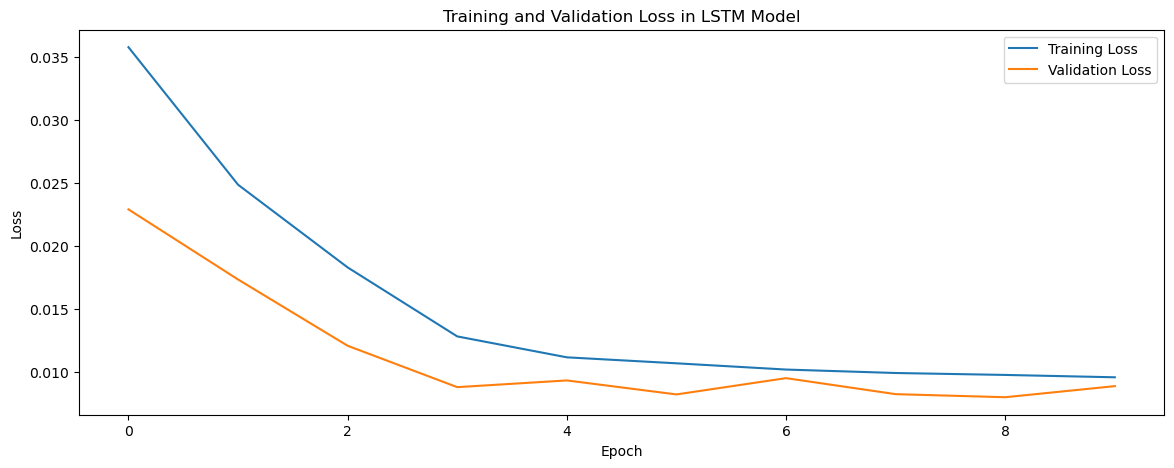

In [70]:
#plot the training and validation loss
plt.figure(figsize=(14, 5))
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss in LSTM Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Make Model 2 Predictions

Generate predictions on the test dataset.

In [72]:
# Making predictions
predictions_2 = model_2.predict(X_test)

302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [73]:
predictions_2.shape

(9639, 1)

## Model Model 2 Evaluation

Evaluate the performance of our secoend model on the test dataset.

Calculate evaluation metrics using MAE, MSE.

In [175]:
# Assuming you have the true values (y_true) and the predicted values (y_pred)
mae = mean_absolute_error(y_test, predictions_2)
r = root_mean_squared_error(y_test, predictions_2)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {r:.2f}")

MAE: 0.06
RMSE: 0.09


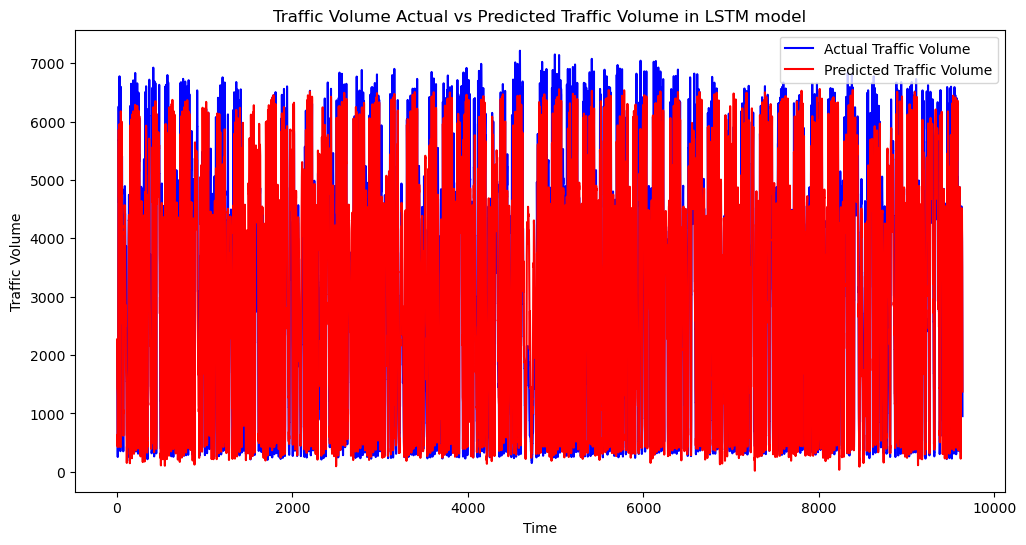

In [76]:
predictions_rescaled_2 = scaler_target.inverse_transform(np.concatenate((predictions_2, np.zeros((predictions_2.shape[0], 10))), axis=1))[:, 0]
Y_test_rescaled_2 = scaler_target.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 10))), axis=1))[:, 0]

plt.figure(figsize=(12,6))
plt.plot(Y_test_rescaled_2, label='Actual Traffic Volume', color='blue')
plt.plot(predictions_rescaled_2, label='Predicted Traffic Volume', color='red')
plt.title('Traffic Volume Actual vs Predicted Traffic Volume in LSTM model')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

**GRU Model Training**

In [78]:
# Build the GRU model
model_3 = Sequential()

model_3.add(GRU(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_3.add(GRU(32))
model_3.add(Dense(1))


model_3.compile(optimizer='adam', loss='mean_squared_error')

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [79]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 10, 64)         │        14,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,033 (93.88 KB)

 Trainable params: 24,033 (93.88 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_3 = model_3.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0451 - val_loss: 0.0221
Epoch 2/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0231 - val_loss: 0.0142
Epoch 3/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0140 - val_loss: 0.0101
Epoch 4/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0119 - val_loss: 0.0087
Epoch 5/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0109 - val_loss: 0.0088
Epoch 6/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0105 - val_loss: 0.0088
Epoch 7/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0105 - val_loss: 0.0086
Epoch 8/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0103 - val_loss: 0.0087
Epoch 9/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0098 - val_loss: 0.0081
Epoch 10/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0094 - val_loss: 0.0083


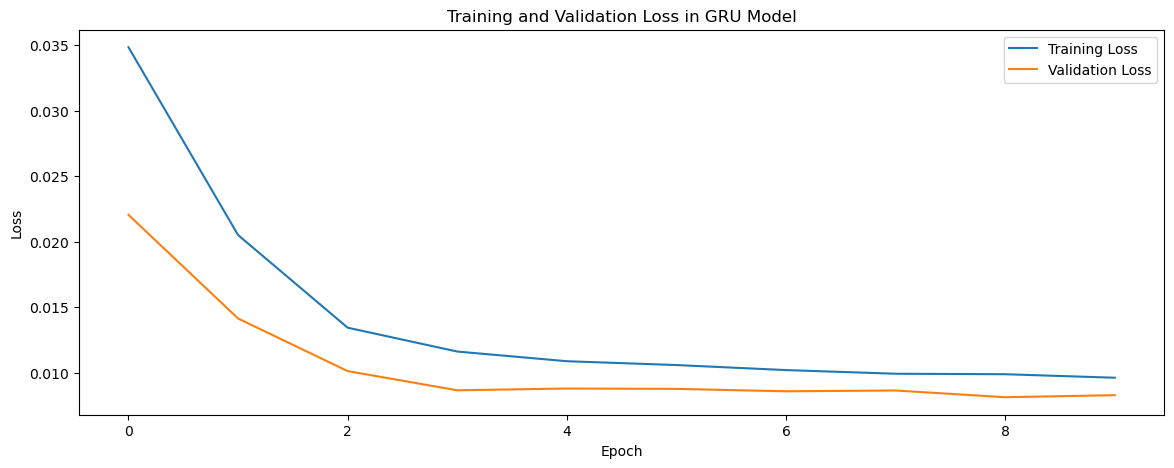

In [153]:
#plot the training and validation loss
plt.figure(figsize=(14, 5))
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss in GRU Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Make Model 3 Predictions

Generate predictions on the test dataset.

In [156]:
# Making predictions
predictions_3 = model_3.predict(X_test)

302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step


In [158]:
predictions_3.shape

(9639, 1)

## Model Model 3 Evaluation

Evaluate the performance of our third model on the test dataset.

Calculate evaluation metrics using MAE, MSE.

In [177]:
# Assuming you have the true values (y_true) and the predicted values (y_pred)
mae = mean_absolute_error(y_test, predictions_3)
r = root_mean_squared_error(y_test, predictions_3)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {r:.2f}")

MAE: 0.06
RMSE: 0.09


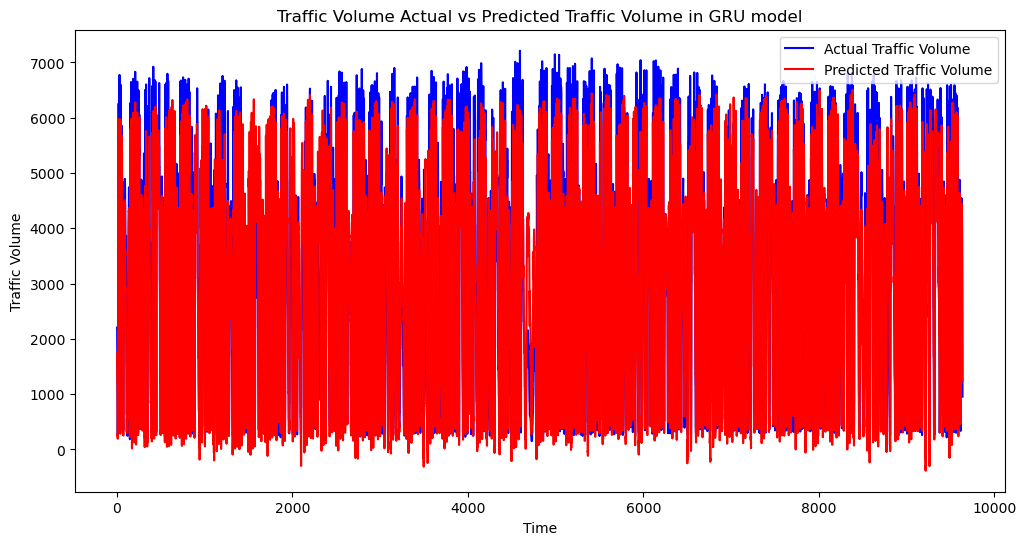

In [169]:
predictions_rescaled_3 = scaler_target.inverse_transform(np.concatenate((predictions_3, np.zeros((predictions_3.shape[0], 10))), axis=1))[:, 0]
Y_test_rescaled_3 = scaler_target.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 10))), axis=1))[:, 0]

plt.figure(figsize=(12,6))
plt.plot(Y_test_rescaled_3, label='Actual Traffic Volume', color='blue')
plt.plot(predictions_rescaled_3, label='Predicted Traffic Volume', color='red')
plt.title('Traffic Volume Actual vs Predicted Traffic Volume in GRU model')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

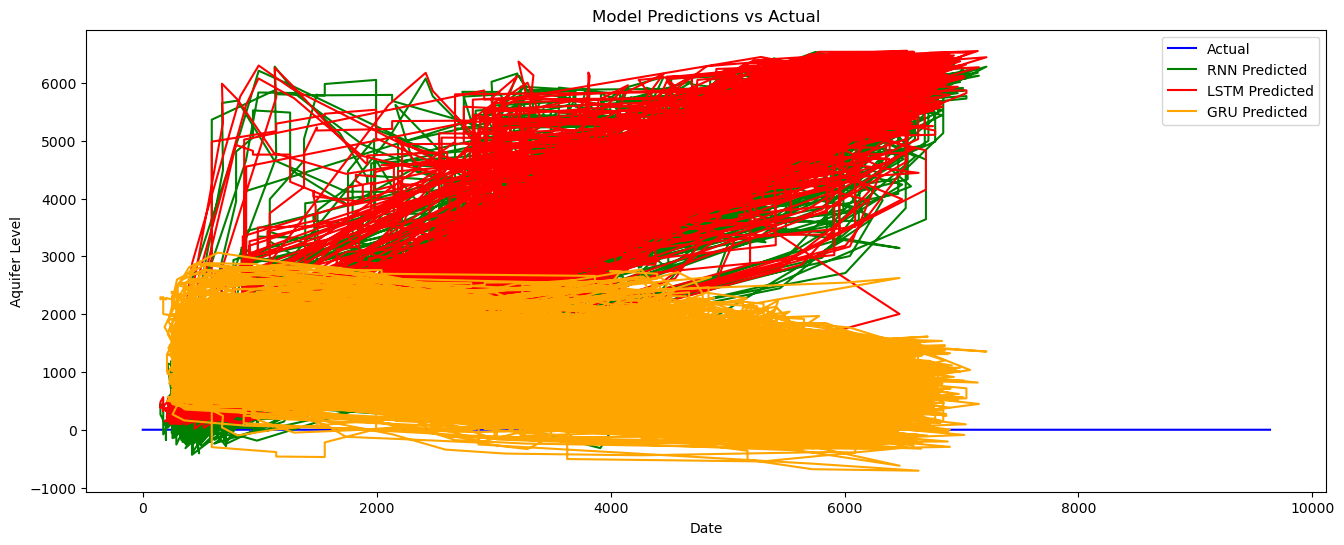

In [88]:
#compare predictions from the three models
plt.figure(figsize=(16, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(Y_test_rescaled_1, predictions_rescaled_1, label='RNN Predicted', color='green')
plt.plot(Y_test_rescaled_2, predictions_rescaled_2, label='LSTM Predicted', color='red')
plt.plot(Y_test_rescaled_3, predictions_rescaled_3, label='GRU Predicted', color='orange')
plt.title('Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Aquifer Level')
plt.legend()
plt.show()